In [2]:
import requests
import json
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:

url = "https://api-nba-v1.p.rapidapi.com/games"

querystring = {"season":'2020'}

headers = {
	"X-RapidAPI-Key": "f6651051bdmshde689e68bbcde88p1a665ejsn51f009ca2865",
	"X-RapidAPI-Host": "api-nba-v1.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

json_str = response.text

json_dict = json.loads(json_str)

json_list = json_dict['response']

len(json_list)

score_visitors_2018=[]

score_home_2018=[]

for id in json_list:
    #print(type(id['scores']['visitors']['points']))
    score_visitors_2018.append(id['scores']['visitors']['points'])
    score_home_2018.append(id['scores']['home']['points'])
    
visitors_2018 = np.array(score_visitors_2018)
home_2018 = np.array(score_home_2018)

visitors_2018


array([113, 113, 105, ..., None, 105, 108], dtype=object)

In [10]:
len(json_list)

1640

In [73]:
home_teams = []
visitor_teams = []
home_scores = []
visiting_scores = []
total_scores = []
seasons = []
postseasons = []
home_conferences = []
home_divisions = []
visitor_conferences = []
visitor_divisions = []

In [74]:
url2 = "https://www.balldontlie.io/api/v1/games/?seasons[]=1980&seasons[]=1981&seasons[]=1982&seasons[]=1983&seasons[]=1984&seasons[]=1985&seasons[]=1986&seasons[]=1987&seasons[]=1988&seasons[]=1989&seasons[]=1990&seasons[]=1991&seasons[]=1992&seasons[]=1993&seasons[]=1994&seasons[]=1995&seasons[]=1996&seasons[]=1997&seasons[]=1998&seasons[]=1999&seasons[]=2000&seasons[]=2001&seasons[]=2002&seasons[]=2003&seasons[]=2004&seasons[]=2005&seasons[]=2006&seasons[]=2007&seasons[]=2008&seasons[]=2009&seasons[]=2010&seasons[]=2011&seasons[]=2012&seasons[]=2013&seasons[]=2014&seasons[]=2015&seasons[]=2016&seasons[]=2017&seasons[]=2018&seasons[]=2019&seasons[]=2020&seasons[]=2021&seasons[]=2022"
#url2 = 'https://www.balldontlie.io/api/v1/games/?start_date[]=1980-01-01&end_date[]=2020-01-01'

params = {
    'page':'1'
}

home_conferences = []

start = time.time()

for page in range(512):
    time.sleep(2)
    params = {'page':page+1,'per_page':'100'}
    response2 = requests.get(url2, params = params)
    print(response2)
    json_str2 = response2.text
    json_dict2 = json.loads(json_str2)
    json_list2 = json_dict2['data']
    for game in range(100):
        
        home_team = json_list2[game]['home_team']['full_name']
        home_teams.append(home_team)
        
        visitor_team = json_list2[game]['visitor_team']['full_name']
        visitor_teams.append(visitor_team)
        
        home_score = json_list2[game]['home_team_score']
        home_scores.append(home_score)
        
        visiting_score = json_list2[game]['visitor_team_score']
        visiting_scores.append(visiting_score)
        
        total_score = home_score + visiting_score
        total_scores.append(total_score)

        season = json_list2[game]['season']
        seasons.append(season)
        
        postseason = json_list2[game]['postseason']
        postseasons.append(postseason)
        
        home_conference = json_list2[game]['home_team']['conference']
        home_conferences.append(home_conference)
        
        home_division = json_list2[game]['home_team']['division']
        home_divisions.append(home_division)
        
        visitor_conference = json_list2[game]['visitor_team']['conference']
        visitor_conferences.append(visitor_conference)
        
        visitor_division = json_list2[game]['visitor_team']['division']
        visitor_divisions.append(visitor_division)
        
end = time.time()

runtime = end - start
print(len(seasons))
print(runtime)


<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
51200
6687.373227119446


In [75]:
len(home_teams)

51200

In [72]:
params = {'page':'512','per_page':'100'}
response2 = requests.get(url2, params = params)
json_str2 = response2.text
json_dict2 = json.loads(json_str2)
json_list2 = json_dict2['data']
json_list2[99]

{'id': 858250,
 'date': '2023-02-24T00:00:00.000Z',
 'home_team': {'id': 30,
  'abbreviation': 'WAS',
  'city': 'Washington',
  'conference': 'East',
  'division': 'Southeast',
  'full_name': 'Washington Wizards',
  'name': 'Wizards'},
 'home_team_score': 109,
 'period': 4,
 'postseason': False,
 'season': 2022,
 'status': 'Final',
 'time': 'Final',
 'visitor_team': {'id': 20,
  'abbreviation': 'NYK',
  'city': 'New York',
  'conference': 'East',
  'division': 'Atlantic',
  'full_name': 'New York Knicks',
  'name': 'Knicks'},
 'visitor_team_score': 115}

In [4]:
df = pd.DataFrame(
                  columns=['Season','Home Score','Visiting Score','Total Score','Postseason'])
df['Home Team'] = home_teams
df['Home Score'] = home_scores
df['Home Conference'] = home_conferences
df['Home Division'] = home_divisions

df['Visiting Team'] = visitor_teams
df['Visiting Score'] = visiting_scores
df['Visiting Conference'] = visitor_conferences
df['Visiting Division'] = visitor_divisions

df['Total Score'] = total_scores
df['Season'] = seasons
df['Postseason'] = postseasons



df.to_csv('NBAGames.csv')

NameError: name 'home_teams' is not defined

In [384]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
...                    columns=['a', 'b', 'c'])
df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [377]:
len(home_teams)

35325

In [77]:
df

,Season,Home Score,Visiting Score,Total Score,Postseason,Home Team,Home Conference,Home Division,Visiting Team,Visiting Conference,Visiting Division
0,1980,122,103,225,False,Portland Trail Blazers,West,Northwest,Denver Nuggets,West,Northwest
1,1980,96,102,198,False,Indiana Pacers,East,Central,Los Angeles Lakers,West,Pacific
2,1980,99,103,202,False,Cleveland Cavaliers,East,Central,Milwaukee Bucks,East,Central
3,1980,98,100,198,False,Dallas Mavericks,West,Southwest,Atlanta Hawks,East,Southeast
4,1980,96,89,185,False,Oklahoma City Thunder,West,Northwest,Utah Jazz,West,Northwest
...,...,...,...,...,...,...,...,...,...,...,...
51195,2022,123,102,225,False,Utah Jazz,West,Northwest,Denver Nuggets,West,Northwest
51196,2022,120,110,230,False,Charlotte Hornets,East,Southeast,San Antonio Spurs,West,Southwest
51197,2022,100,112,212,False,Chicago Bulls,East,Central,Milwaukee Bucks,East,Central
51198,2022,109,115,224,False,Cleveland Cavaliers,East,Central,Denver Nuggets,West,Northwest


In [4]:
df = pd.read_csv('NBAGames.csv')

In [14]:
df = df.drop('Unnamed: 0',axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

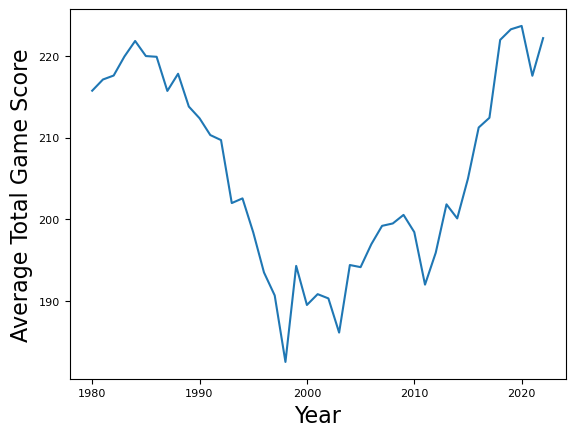

In [4]:
avg_season_scores = df.groupby('Season').mean()["Total Score"].ffill()
years = range(1980,2023)
plt.rcParams['font.size'] = 16
plt.plot(years, avg_season_scores)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Year')
plt.ylabel('Average Total Game Score')
plt.savefig('decades.jpg')


In [379]:
# Warriors
home = df[df['Home Team'] == 'Golden State Warriors']
home['Score'] = home['Home Score']
home = home.drop(columns=['Visiting Score','Total Score','Home Score','Postseason','Home Team','Home Conference',
                  'Home Division','Visiting Team','Visiting Conference','Visiting Division'])

away = df[df['Visiting Team'] == 'Golden State Warriors']
away['Score'] = away['Visiting Score']
away = away.drop(columns=['Visiting Score','Total Score','Home Score','Postseason','Home Team','Home Conference',
                  'Home Division','Visiting Team','Visiting Conference','Visiting Division'])

warriors = pd.concat([home,away])
warriors_scores = warriors.groupby('Season').mean()['Score']

/var/folders/dz/gflcnjqn2n5b_9cvt11qn8sr0000gn/T/ipykernel_31015/4083986886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['Score'] = home['Home Score']
/var/folders/dz/gflcnjqn2n5b_9cvt11qn8sr0000gn/T/ipykernel_31015/4083986886.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away['Score'] = away['Visiting Score']


In [115]:
# Jazz
home = df[df['Home Team'] == 'Utah Jazz']
home['Score'] = home['Home Score']
home = home.drop(columns=['Visiting Score','Total Score','Home Score','Postseason','Home Team','Home Conference',
                  'Home Division','Visiting Team','Visiting Conference','Visiting Division'])

away = df[df['Visiting Team'] == 'Utah Jazz']
away['Score'] = away['Visiting Score']
away = away.drop(columns=['Visiting Score','Total Score','Home Score','Postseason','Home Team','Home Conference',
                  'Home Division','Visiting Team','Visiting Conference','Visiting Division'])

jazz = pd.concat([home,away])
jazz_scores = jazz.groupby('Season').mean()['Score']

/var/folders/dz/gflcnjqn2n5b_9cvt11qn8sr0000gn/T/ipykernel_31015/2420178076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['Score'] = home['Home Score']
/var/folders/dz/gflcnjqn2n5b_9cvt11qn8sr0000gn/T/ipykernel_31015/2420178076.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away['Score'] = away['Visiting Score']


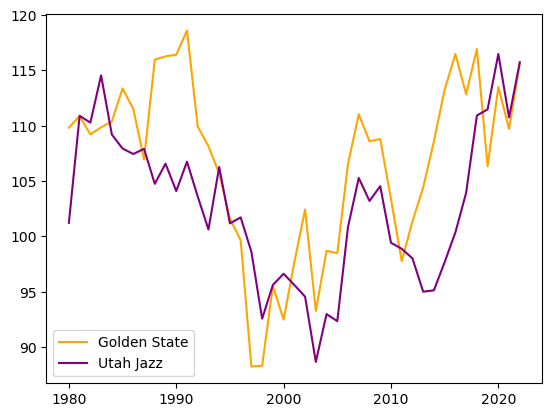

In [129]:
# Jazz vs. Warriors Scoring
plt.plot(years, warriors_scores,color = 'orange',label='Golden State')
plt.plot(years, jazz_scores,color = 'purple',label='Utah Jazz')
plt.legend(loc='lower left')

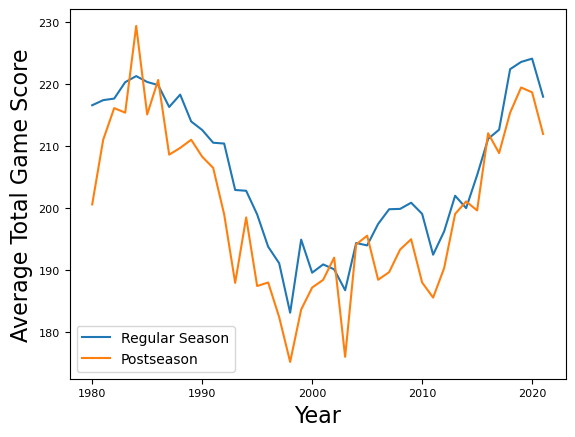

In [412]:
# Regular Season vs. Postseason Scoring
regular = df[df['Postseason'] == False]
avg_reg = regular.groupby('Season').mean()["Total Score"]
avg_reg

plt.rcParams['font.size'] = 16
plt.plot(years[0:42], avg_reg[0:42],label="Regular Season")
plt.plot(years[0:42], avg_post[0:42],label="Postseason")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(loc='lower left',prop={'size':10})
plt.xlabel("Year")
plt.ylabel('Average Total Game Score')
plt.savefig('RegvsPost.jpg')

In [219]:
score_diff = {}
for i in range(30):
    home = df[df["Home Team"] == teams[i]]["Home Score"].mean()
    away = df[df["Visiting Team"] == teams[i]]["Visiting Score"].mean()
    diff = home - away
    new_val = {teams[i]:diff}
    score_diff.update(new_val)

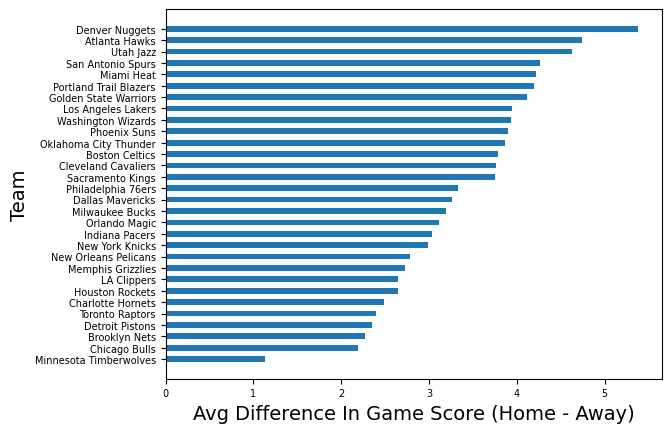

In [411]:
# Scoring Differential
dfbar = pd.DataFrame({"Team":list(score_diff.keys()),"Score":list(score_diff.values())})
dfbar = dfbar.sort_values('Score',ascending=True)
plt.rcParams['font.size'] = 14
plt.barh(dfbar['Team'],dfbar['Score'],height=0.5)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.xlabel('Avg Difference In Game Score (Home - Away)')
plt.ylabel('Team')
plt.savefig('scorediff.jpg')

/var/folders/dz/gflcnjqn2n5b_9cvt11qn8sr0000gn/T/ipykernel_31015/2968847413.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  west_all_scores = west_home_scores.append(west_visiting_scores)
/var/folders/dz/gflcnjqn2n5b_9cvt11qn8sr0000gn/T/ipykernel_31015/2968847413.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  east_all_scores = east_home_scores.append(east_visiting_scores)


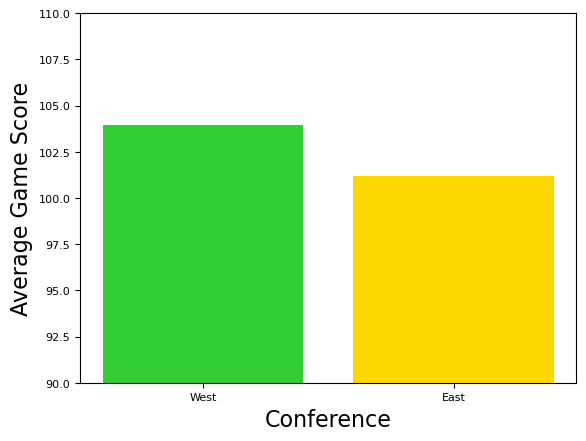

In [410]:
# West

west_home_scores = df[df['Home Conference'] == 'West']['Home Score']
west_visiting_scores = df[df['Visiting Conference'] == 'West']['Visiting Score']
west_all_scores = west_home_scores.append(west_visiting_scores)
west = west_all_scores.mean()

# East
east_home_scores = df[df['Home Conference'] == 'East']['Home Score']
east_visiting_scores = df[df['Visiting Conference'] == 'East']['Visiting Score']
east_all_scores = east_home_scores.append(east_visiting_scores)
east = east_all_scores.mean()

plt.rcParams['font.size'] = 16
plt.bar(['West','East'],[west,east],color=['limegreen','gold'])
plt.ylim(90,110)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Conference')
plt.ylabel('Average Game Score')
plt.savefig('conferences.jpg')

/var/folders/dz/gflcnjqn2n5b_9cvt11qn8sr0000gn/T/ipykernel_31015/3418133233.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nw_all_scores = nw_home_scores.append(nw_visiting_scores)
/var/folders/dz/gflcnjqn2n5b_9cvt11qn8sr0000gn/T/ipykernel_31015/3418133233.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sw_all_scores = sw_home_scores.append(sw_visiting_scores)
/var/folders/dz/gflcnjqn2n5b_9cvt11qn8sr0000gn/T/ipykernel_31015/3418133233.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_all_scores = p_home_scores.append(p_visiting_scores)
/var/folders/dz/gflcnjqn2n5b_9cvt11qn8sr0000gn/T/ipykernel_31015/3418133233.py:22: FutureWarning: The series.append method is deprecated and will be removed from pandas in a

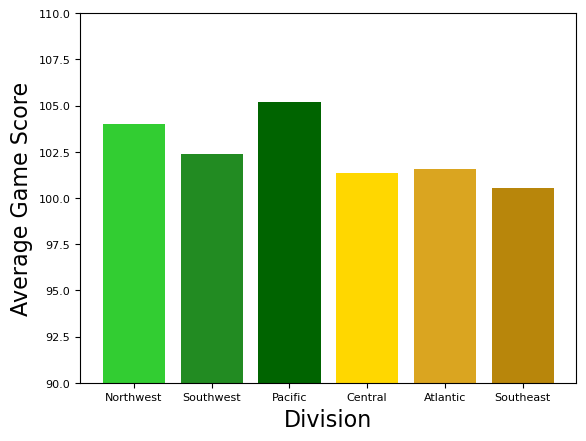

In [409]:

# Northwest
nw_home_scores = df[df['Home Division'] == 'Northwest']['Home Score']
nw_visiting_scores = df[df['Visiting Division'] == 'Northwest']['Visiting Score']
nw_all_scores = nw_home_scores.append(nw_visiting_scores)
nw = nw_all_scores.mean()

# Southwest
sw_home_scores = df[df['Home Division'] == 'Southwest']['Home Score']
sw_visiting_scores = df[df['Visiting Division'] == 'Southwest']['Visiting Score']
sw_all_scores = sw_home_scores.append(sw_visiting_scores)
sw = sw_all_scores.mean()

# Pacific
p_home_scores = df[df['Home Division'] == 'Pacific']['Home Score']
p_visiting_scores = df[df['Visiting Division'] == 'Pacific']['Visiting Score']
p_all_scores = p_home_scores.append(p_visiting_scores)
p = p_all_scores.mean()

# Central
c_home_scores = df[df['Home Division'] == 'Central']['Home Score']
c_visiting_scores = df[df['Visiting Division'] == 'Central']['Visiting Score']
c_all_scores = c_home_scores.append(c_visiting_scores)
c = c_all_scores.mean()

# Atlantic
a_home_scores = df[df['Home Division'] == 'Atlantic']['Home Score']
a_visiting_scores = df[df['Visiting Division'] == 'Atlantic']['Visiting Score']
a_all_scores = a_home_scores.append(a_visiting_scores)
a = a_all_scores.mean()

# Southeast
se_home_scores = df[df['Home Division'] == 'Southeast']['Home Score']
se_visiting_scores = df[df['Visiting Division'] == 'Southeast']['Visiting Score']
se_all_scores = se_home_scores.append(se_visiting_scores)
se = se_all_scores.mean()

divisions = [nw,sw,p,c,a,se]
plt.rcParams['font.size'] = 16
plt.bar(['Northwest','Southwest','Pacific','Central','Atlantic','Southeast'],divisions,
        color=['limegreen','forestgreen','darkgreen','gold','goldenrod','darkgoldenrod'])
plt.ylim(90,110)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Division')
plt.ylabel('Average Game Score')
plt.savefig('divisions.jpg')



In [300]:
junk = df[df['Home Conference'] == 'West']['Home Score']
junk

0        122
3         98
4         96
6         98
9        103
        ... 
51179    108
51183     88
51190      0
51193    139
51195    123
Name: Home Score, Length: 25575, dtype: int64

In [312]:
df

,Season,Home Score,Visiting Score,Total Score,Postseason,Home Team,Home Conference,Home Division,Visiting Team,Visiting Conference,Visiting Division
0,1980,122,103,225,False,Portland Trail Blazers,West,Northwest,Denver Nuggets,West,Northwest
1,1980,96,102,198,False,Indiana Pacers,East,Central,Los Angeles Lakers,West,Pacific
2,1980,99,103,202,False,Cleveland Cavaliers,East,Central,Milwaukee Bucks,East,Central
3,1980,98,100,198,False,Dallas Mavericks,West,Southwest,Atlanta Hawks,East,Southeast
4,1980,96,89,185,False,Oklahoma City Thunder,West,Northwest,Utah Jazz,West,Northwest
...,...,...,...,...,...,...,...,...,...,...,...
51195,2022,123,102,225,False,Utah Jazz,West,Northwest,Denver Nuggets,West,Northwest
51196,2022,120,110,230,False,Charlotte Hornets,East,Southeast,San Antonio Spurs,West,Southwest
51197,2022,100,112,212,False,Chicago Bulls,East,Central,Milwaukee Bucks,East,Central
51198,2022,109,115,224,False,Cleveland Cavaliers,East,Central,Denver Nuggets,West,Northwest


In [15]:
df = pd.read_csv('NBAGames.csv')
type(avg_season_scores)
junk = pd.DataFrame(avg_season_scores)
junk = junk.reset_index()
fig = px.line(junk, x="Season", y="Total Score", markers=True)
fig.add_vline(x=1979)
fig.add_vline(x=2009)
fig.show()
fig.write_html('Final.html')

In [20]:
df = px.data.gapminder().query("country=='Canada'")
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.750,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.960,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.300,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.130,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.880,22284500,18970.57086,CAN,124
245,Canada,Americas,1977,74.210,23796400,22090.88306,CAN,124
246,Canada,Americas,1982,75.760,25201900,22898.79214,CAN,124
247,Canada,Americas,1987,76.860,26549700,26626.51503,CAN,124
248,Canada,Americas,1992,77.950,28523502,26342.88426,CAN,124
249,Canada,Americas,1997,78.610,30305843,28954.92589,CAN,124
